# Automating Crypto Website API Pull Using Python

In [51]:
#gọi API CoinMarketCap để lấy danh sách các đồng tiền điện tử mới nhất 

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'5000',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'c639fa4d-b125-43a4-9c30-130f141f600d',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)
    

{'status': {'timestamp': '2025-06-28T14:53:55.696Z', 'error_code': 0, 'error_message': None, 'elapsed': 73, 'credit_count': 25, 'notice': None, 'total_count': 9529}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 12230, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

In [5]:
type(data)

dict

In [12]:
import pandas as pd

pd.set_option('display.max_columns', None)

In [8]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')

NameError: name 'data' is not defined

In [35]:

df

id         name   symbol         slug  num_market_pairs  \
0         1      Bitcoin      BTC      bitcoin             12230   
1      1027     Ethereum      ETH     ethereum             10357   
2       825  Tether USDt     USDT       tether            134282   
3        52          XRP      XRP          xrp              1632   
4      1839          BNB      BNB          bnb              2595   
...     ...          ...      ...          ...               ...   
4995  36763      Cartier  CARTIER      cartier                 3   
4996  28881       Doodoo   DOODOO       doodoo                16   
4997  36217       Boogie   BOOGIE       boogie                 2   
4998  32595     Argocoin      AGC     argocoin                 7   
4999  36950         Boji     BOJI  boji-solana                 1   

                    date_added  \
0     2010-07-13T00:00:00.000Z   
1     2015-08-07T00:00:00.000Z   
2     2015-02-25T00:00:00.000Z   
3     2013-08-04T00:00:00.000Z   
4     2017-07-25T00:00:00.000Z   
...                        ...   
4995  2025-06-09T07:59:17.000Z   
4996  2023-12-29T11:53:42.000Z   
4997  2025-04-08T06:42:21.000Z   
4998  2024-08-08T17:36:23.000Z   
4999  2025-06-25T12:51:51.000Z   

                                                   tags    max_supply  \
0     [mineable, pow, sha-256, store-of-value, state...  2.100000e+07   
1     [pos, smart-contracts, ethereum-ecosystem, coi...           NaN   
2     [stablecoin, asset-backed-stablecoin, usd-stab...           NaN   
3     [medium-of-exchange, enterprise-solutions, xrp...  1.000000e+11   
4     [marketplace, centralized-exchange, payments, ...           NaN   
...                                                 ...           ...   
4995                       [memes, bnb-chain-ecosystem]  1.000000e+08   
4996                  [memes, aptos-ecosystem, move-vm]  4.200000e+07   
4997                                 [solana-ecosystem]  4.885000e+08   
4998                      [ai-big-data, base-ecosystem]  1.000000e+08   
4999                          [memes, solana-ecosystem]  1.000000e+09   

       circulating_supply         total_supply  infinite_supply  platform  \
0                19884556             19884556            False       NaN   
1        120717903.357786     120717903.357786             True       NaN   
2     157480181404.657928  159826220133.608185             True       NaN   
3             59005546715          99985991375            False       NaN   
4            140885566.63         140885566.63            False       NaN   
...                   ...                  ...              ...       ...   
4995                    0            100000000            False       NaN   
4996                    0             42000000            False       NaN   
4997                    0            488500000            False       NaN   
4998                    0             50480000            False       NaN   
4999                    0           1000000000            False       NaN   

      cmc_rank  self_reported_circulating_supply  self_reported_market_cap  \
0            1                               NaN                       NaN   
1            2                               NaN                       NaN   
2            3                               NaN                       NaN   
3            4                               NaN                       NaN   
4            5                               NaN                       NaN   
...        ...                               ...                       ...   
4995      4996                      3.000000e+07              2.132993e+08   
4996      4997                      4.000000e+06              4.848255e+05   
4997      4998                      4.885000e+08              9.871795e+04   
4998      4999                      8.080000e+06              3.431416e+05   
4999      5000                      1.000000e+09              1.365857e+04   

      tvl_ratio              last_updated  q

#### Trong Python, mỗi biến nằm trong một phạm vi (scope).

##### - Biến bên ngoài hàm gọi là biến toàn cục (global).
##### - Biến bên trong hàm chỉ dùng được trong hàm đó, gọi là biến cục bộ (local).

In [73]:
#muốn tạo vòng lặp chạy lại tất cả các thứ này ngày qua ngày thì sử dụng hàm def()

#global df: cho phép hàm thay đổi giá trị biến df toàn cục (biến ở ngoài)
def api_runner():
    global df 
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': 'c639fa4d-b125-43a4-9c30-130f141f600d',
    }
    
    session = Session()
    session.headers.update(headers)
    
    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

    df2 = pd.json_normalize(data['data'])
    df2['timestamp'] = pd.to_datetime('now')
    
    #df = df.append(df2)
    df_append = pd.DataFrame(df2)
    df = pd.concat([df2,df_append])

    #thêm file vào csv
    #kiểm tra file này có từng tồn tại chưa, nếu chưa thì tạo tệp đó và tạo tiêu đề cột dựa trên khung dữ liệu này
    if not os.path.isfile('/Users/mac/Desktop/THỰC HÀNH DA/PORTFOLIO/API.csv'):
        df.to_csv('/Users/mac/Desktop/THỰC HÀNH DA/PORTFOLIO/API.csv', header = 'column_')
    else: #nếu muốn thêm dữ liệu mà không bị ghi đè lên
        df.to_csv('/Users/mac/Desktop/THỰC HÀNH DA/PORTFOLIO/API.csv', mode = 'a', header = False)



In [ ]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60)
exit()

{'status': {'timestamp': '2025-06-28T15:54:12.389Z', 'error_code': 0, 'error_message': None, 'elapsed': 29, 'credit_count': 1, 'notice': None, 'total_count': 9529}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 12230, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [56]:
df3 = pd.read_csv('/Users/mac/Desktop/THỰC HÀNH DA/PORTFOLIO/API.csv')
df3

Unnamed: 0     id          name symbol          slug  num_market_pairs  \
0              0      1       Bitcoin    BTC       bitcoin             12230   
1              1   1027      Ethereum    ETH      ethereum             10357   
2              2    825   Tether USDt   USDT        tether            134285   
3              3     52           XRP    XRP           xrp              1632   
4              4   1839           BNB    BNB           bnb              2595   
...          ...    ...           ...    ...           ...               ...   
2425          10  32196   Hyperliquid   HYPE   hyperliquid               111   
2426          11   1831  Bitcoin Cash    BCH  bitcoin-cash              1029   
2427          12  20947           Sui    SUI           sui               690   
2428          13   1975     Chainlink   LINK     chainlink              2025   
2429          14   3957  UNUS SED LEO    LEO  unus-sed-leo                61   

                    date_added  \
0     2010-07-13T00:00:00.000Z   
1     2015-08-07T00:00:00.000Z   
2     2015-02-25T00:00:00.000Z   
3     2013-08-04T00:00:00.000Z   
4     2017-07-25T00:00:00.000Z   
...                        ...   
2425  2024-07-15T10:14:50.000Z   
2426  2017-07-23T00:00:00.000Z   
2427  2022-07-12T08:03:11.000Z   
2428  2017-09-20T00:00:00.000Z   
2429  2019-05-21T00:00:00.000Z   

                                                   tags         max_supply  \
0     ['mineable', 'pow', 'sha-256', 'store-of-value...     21000000.00000   
1     ['pos', 'smart-contracts', 'ethereum-ecosystem...                NaN   
2     ['stablecoin', 'asset-backed-stablecoin', 'usd...                NaN   
3     ['medium-of-exchange', 'enterprise-solutions',... 100000000000.00000   
4     ['marketplace', 'centralized-exchange', 'payme...                NaN   
...                                                 ...                ...   
2425  ['decentralized-exchange-dex-token', 'defi', '...   1000000000.00000   
2426  ['mineable', 'pow', 'sha-256', 'marketplace', ...     21000000.00000   
2427  ['binance-launchpool', 'coinbase-ventures-port...  10000000000.00000   
2428  ['platform', 'defi', 'oracles', 'smart-contrac...                NaN   
2429  ['marketplace', 'centralized-exchange', 'disco...                NaN   

      circulating_supply  ...  quote.USD.market_cap_dominance  \
0         19884656.00000  ...                        64.84690   
1        120717903.35779  ...                         8.91430   
2     157490226188.26880  ...                         4.78590   
3      59005546715.00000  ...                         3.94590   
4        140885551.86000  ...                         2.76560   
...                  ...  ...                             ...   
2425     333928180.00000  ...                         0.37500   
2426      19890106.25000  ...                         0.29660   
2427    3396671135.36444  ...                         0.28430   
2428     678099970.45279  ...                         0.27250   
2429     923162599.90000  ...                         0.25500   

      quote.USD.fully_diluted_market_cap  quote.USD.tvl  \
0                    2254217642949.00000            NaN   
1                     293420881035.81000            NaN   
2                     159867187636.57001            NaN   
3                     220120978572.38000            NaN   
4                      91033395257.66000            NaN   
...                                  ...            ...   
2425                   37004117238.43000            NaN   
2426                   10317811126.94000            NaN   
2427                   27582058310.62000            NaN   
2428                   13240567265.18000            NaN   
2429                    8967908968.74000            NaN   

        quote.USD.last_updated  platform.id  platform.name  platform.symbol  \
0     2025-06-28T15:53:00.000Z          NaN            NaN              NaN   
1     2025-06-28T15:53:00.000Z          NaN        

In [58]:
#làm sạch dữ liệu

#định dạng cách hiển thị số thực (float): làm tròn số x và in ra với 5 chữ số sau dấu chấm
pd.set_option('display.float_format', lambda x: '%.5f' %x)

In [14]:
df3

id          name symbol          slug  num_market_pairs  \
0         1       Bitcoin    BTC       bitcoin             12230   
1      1027      Ethereum    ETH      ethereum             10357   
2       825   Tether USDt   USDT        tether            134285   
3        52           XRP    XRP           xrp              1632   
4      1839           BNB    BNB           bnb              2595   
...     ...           ...    ...           ...               ...   
2425  32196   Hyperliquid   HYPE   hyperliquid               111   
2426   1831  Bitcoin Cash    BCH  bitcoin-cash              1029   
2427  20947           Sui    SUI           sui               690   
2428   1975     Chainlink   LINK     chainlink              2025   
2429   3957  UNUS SED LEO    LEO  unus-sed-leo                61   

                    date_added  \
0     2010-07-13T00:00:00.000Z   
1     2015-08-07T00:00:00.000Z   
2     2015-02-25T00:00:00.000Z   
3     2013-08-04T00:00:00.000Z   
4     2017-07-25T00:00:00.000Z   
...                        ...   
2425  2024-07-15T10:14:50.000Z   
2426  2017-07-23T00:00:00.000Z   
2427  2022-07-12T08:03:11.000Z   
2428  2017-09-20T00:00:00.000Z   
2429  2019-05-21T00:00:00.000Z   

                                                   tags         max_supply  \
0     ['mineable', 'pow', 'sha-256', 'store-of-value...     21000000.00000   
1     ['pos', 'smart-contracts', 'ethereum-ecosystem...                NaN   
2     ['stablecoin', 'asset-backed-stablecoin', 'usd...                NaN   
3     ['medium-of-exchange', 'enterprise-solutions',... 100000000000.00000   
4     ['marketplace', 'centralized-exchange', 'payme...                NaN   
...                                                 ...                ...   
2425  ['decentralized-exchange-dex-token', 'defi', '...   1000000000.00000   
2426  ['mineable', 'pow', 'sha-256', 'marketplace', ...     21000000.00000   
2427  ['binance-launchpool', 'coinbase-ventures-port...  10000000000.00000   
2428  ['platform', 'defi', 'oracles', 'smart-contrac...                NaN   
2429  ['marketplace', 'centralized-exchange', 'disco...                NaN   

      circulating_supply       total_supply  ...  \
0         19884656.00000     19884656.00000  ...   
1        120717903.35779    120717903.35779  ...   
2     157490226188.26880 159826220133.30725  ...   
3      59005546715.00000  99985991375.00000  ...   
4        140885551.86000    140885551.86000  ...   
...                  ...                ...  ...   
2425     333928180.00000    999993930.00000  ...   
2426      19890106.25000     19890106.25000  ...   
2427    3396671135.36444  10000000000.00000  ...   
2428     678099970.45279   1000000000.00000  ...   
2429     923162599.90000    985239504.00000  ...   

      quote.USD.market_cap_dominance  quote.USD.fully_diluted_market_cap  \
0                           64.84690                 2254217642949.00000   
1                            8.91430                  293420881035.81000   
2                            4.78590                  159867187636.57001   
3                            3.94590                  220120978572.38000   
4                            2.76560                   91033395257.66000   
...                              ...                                 ...   
2425                         0.37500                   37004117238.43000   
2426                         0.29660                   10317811126.94000   
2427                         0.28430                   27582058310.62000   
2428                         0.27250                   13240567265.18000   
2429                         0.25500                    8967908968.74000   

      quote.USD.tvl    quote.USD.last_updated  platform.id  platform.name  \
0               NaN  2025-06-28T15:53:00.000Z          NaN            NaN   
1               NaN  2025-06-28T15:53:00.000Z          NaN            NaN   
2               NaN  2025-06-28T15:52:00.000Z   1027.00000       Ethereum   


In [60]:
df3 = df3.drop(columns = 'Unnamed: 0')

In [62]:
df3

id          name symbol          slug  num_market_pairs  \
0         1       Bitcoin    BTC       bitcoin             12230   
1      1027      Ethereum    ETH      ethereum             10357   
2       825   Tether USDt   USDT        tether            134285   
3        52           XRP    XRP           xrp              1632   
4      1839           BNB    BNB           bnb              2595   
...     ...           ...    ...           ...               ...   
2425  32196   Hyperliquid   HYPE   hyperliquid               111   
2426   1831  Bitcoin Cash    BCH  bitcoin-cash              1029   
2427  20947           Sui    SUI           sui               690   
2428   1975     Chainlink   LINK     chainlink              2025   
2429   3957  UNUS SED LEO    LEO  unus-sed-leo                61   

                    date_added  \
0     2010-07-13T00:00:00.000Z   
1     2015-08-07T00:00:00.000Z   
2     2015-02-25T00:00:00.000Z   
3     2013-08-04T00:00:00.000Z   
4     2017-07-25T00:00:00.000Z   
...                        ...   
2425  2024-07-15T10:14:50.000Z   
2426  2017-07-23T00:00:00.000Z   
2427  2022-07-12T08:03:11.000Z   
2428  2017-09-20T00:00:00.000Z   
2429  2019-05-21T00:00:00.000Z   

                                                   tags         max_supply  \
0     ['mineable', 'pow', 'sha-256', 'store-of-value...     21000000.00000   
1     ['pos', 'smart-contracts', 'ethereum-ecosystem...                NaN   
2     ['stablecoin', 'asset-backed-stablecoin', 'usd...                NaN   
3     ['medium-of-exchange', 'enterprise-solutions',... 100000000000.00000   
4     ['marketplace', 'centralized-exchange', 'payme...                NaN   
...                                                 ...                ...   
2425  ['decentralized-exchange-dex-token', 'defi', '...   1000000000.00000   
2426  ['mineable', 'pow', 'sha-256', 'marketplace', ...     21000000.00000   
2427  ['binance-launchpool', 'coinbase-ventures-port...  10000000000.00000   
2428  ['platform', 'defi', 'oracles', 'smart-contrac...                NaN   
2429  ['marketplace', 'centralized-exchange', 'disco...                NaN   

      circulating_supply       total_supply  ...  \
0         19884656.00000     19884656.00000  ...   
1        120717903.35779    120717903.35779  ...   
2     157490226188.26880 159826220133.30725  ...   
3      59005546715.00000  99985991375.00000  ...   
4        140885551.86000    140885551.86000  ...   
...                  ...                ...  ...   
2425     333928180.00000    999993930.00000  ...   
2426      19890106.25000     19890106.25000  ...   
2427    3396671135.36444  10000000000.00000  ...   
2428     678099970.45279   1000000000.00000  ...   
2429     923162599.90000    985239504.00000  ...   

      quote.USD.market_cap_dominance  quote.USD.fully_diluted_market_cap  \
0                           64.84690                 2254217642949.00000   
1                            8.91430                  293420881035.81000   
2                            4.78590                  159867187636.57001   
3                            3.94590                  220120978572.38000   
4                            2.76560                   91033395257.66000   
...                              ...                                 ...   
2425                         0.37500                   37004117238.43000   
2426                         0.29660                   10317811126.94000   
2427                         0.28430                   27582058310.62000   
2428                         0.27250                   13240567265.18000   
2429                         0.25500                    8967908968.74000   

      quote.USD.tvl    quote.USD.last_updated  platform.id  platform.name  \
0               NaN  2025-06-28T15:53:00.000Z          NaN            NaN   
1               NaN  2025-06-28T15:53:00.000Z          NaN            NaN   
2               NaN  2025-06-28T15:52:00.000Z   1027.00000       Ethereum   


In [70]:
#EDA
#quote.USD.percent_change_1h: phần trăm thay đổi giá của đồng coin trong vòng 1 giờ gần nhất, tính theo giá trị USD.
#Nếu là giá trị âm → Giá đã giảm
#Nếu là giá trị dương → Giá đã tăng

df31 = df3.groupby('name', sort = False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean()
df31


quote.USD.percent_change_1h  quote.USD.percent_change_24h  \
name                                                                      
Bitcoin                           0.06253                      -0.00378   
Ethereum                          0.26868                       0.01449   
Tether USDt                      -0.00197                      -0.00889   
XRP                               0.04290                       4.46413   
BNB                              -0.02163                      -0.03021   
Solana                            1.13418                       3.79195   
USDC                             -0.00261                      -0.00696   
TRON                             -0.34928                       0.71938   
Dogecoin                          0.32425                       1.05477   
Cardano                           0.41236                       1.34544   
Hyperliquid                       0.70882                       0.52315   
Bitcoin Cash                     -0.06449                      -2.49776   
Sui                               0.24532                      -0.09683   
Chainlink                         0.62373                       1.62880   
UNUS SED LEO                      0.01182                       0.64785   

              quote.USD.percent_change_7d  quote.USD.percent_change_30d  \
name                                                                      
Bitcoin                           3.67966                       0.47191   
Ethereum                          0.59645                      -7.92041   
Tether USDt                       0.00346                       0.01805   
XRP                               4.00436                      -3.40603   
BNB                               1.68226                      -4.94642   
Solana                            6.18756                     -11.95779   
USDC                             -0.01217                       0.01054   
TRON                              0.51722                      -0.61968   
Dogecoin                          1.67397                     -25.76154   
Cardano                          -2.05715                     -23.50486   
Hyperliquid                      11.92242                      15.55621   
Bitcoin Cash                      3.52196                      18.90768   
Sui                               4.52857                     -22.65349   
Chainlink                         6.13617                     -13.61173   
UNUS SED LEO                      1.98349                       0.32643   

              quote.USD.percent_change_60d  quote.USD.percent_change_90d  
name                                                                      
Bitcoin                           12.96735                      30.13894  
Ethereum                          33.80270                      34.86691  
Tether USDt                       -0.00633                       0.04906  
XRP                               -4.11483                       3.06616  
BNB                                7.31835                       7.48002  
Solana                             0.30768                      19.71664  
USDC                              -0.01928                      -0.01606  
TRON                              11.66227                      18.83182  
Dogecoin                          -8.84237                      -2.91518  
Cardano                          -20.79708                     -15.32064  
Hyperliquid                       95.98103                     195.13612  
Bitcoin Cash                      30.65565                      61.87577  
Sui                              -22.93092                      17.24249  
Chainlink                        -10.89371                      -2.09000  
UNUS SED LEO                       1.16075                      -5.49260

In [82]:
#để cho các cột xếp chồng lên nhau
pd.set_option('display.max_rows', None)
df32 = df31.stack()
df32

name                                      
Bitcoin       quote.USD.percent_change_1h      0.06253
              quote.USD.percent_change_24h    -0.00378
              quote.USD.percent_change_7d      3.67966
              quote.USD.percent_change_30d     0.47191
              quote.USD.percent_change_60d    12.96735
              quote.USD.percent_change_90d    30.13894
Ethereum      quote.USD.percent_change_1h      0.26868
              quote.USD.percent_change_24h     0.01449
              quote.USD.percent_change_7d      0.59645
              quote.USD.percent_change_30d    -7.92041
              quote.USD.percent_change_60d    33.80270
              quote.USD.percent_change_90d    34.86691
Tether USDt   quote.USD.percent_change_1h     -0.00197
              quote.USD.percent_change_24h    -0.00889
              quote.USD.percent_change_7d      0.00346
              quote.USD.percent_change_30d     0.01805
              quote.USD.percent_change_60d    -0.00633
              quote.US

In [80]:
#đây không thuộc dạng DataFrame mà ở dạng Series
type(df32)

pandas.core.series.Series

In [86]:
#đổi định dạng Series sang DataFrame

#Chuyển Series → DataFrame, và đặt tên cột là values
df33 = df32.to_frame(name = 'values')
df33

values
name                                               
Bitcoin      quote.USD.percent_change_1h    0.06253
             quote.USD.percent_change_24h  -0.00378
             quote.USD.percent_change_7d    3.67966
             quote.USD.percent_change_30d   0.47191
             quote.USD.percent_change_60d  12.96735
             quote.USD.percent_change_90d  30.13894
Ethereum     quote.USD.percent_change_1h    0.26868
             quote.USD.percent_change_24h   0.01449
             quote.USD.percent_change_7d    0.59645
             quote.USD.percent_change_30d  -7.92041
             quote.USD.percent_change_60d  33.80270
             quote.USD.percent_change_90d  34.86691
Tether USDt  quote.USD.percent_change_1h   -0.00197
             quote.USD.percent_change_24h  -0.00889
             quote.USD.percent_change_7d    0.00346
             quote.USD.percent_change_30d   0.01805
             quote.USD.percent_change_60d  -0.00633
             quote.USD.percent_change_90d   0.04906
XRP          quote.USD.percent_change_1h    0.04290
             quote.USD.percent_change_24h   4.46413
             quote.USD.percent_change_7d    4.00436
             quote.USD.percent_change_30d  -3.40603
             quote.USD.percent_change_60d  -4.11483
             quote.USD.percent_change_90d   3.06616
BNB          quote.USD.percent_change_1h   -0.02163
             quote.USD.percent_change_24h  -0.03021
             quote.USD.percent_change_7d    1.68226
             quote.USD.percent_change_30d  -4.94642
             quote.USD.percent_change_60d   7.31835
             quote.USD.percent_change_90d   7.48002
Solana       quote.USD.percent_change_1h    1.13418
             quote.USD.percent_change_24h   3.79195
             quote.USD.percent_change_7d    6.18756
             quote.USD.percent_change_30d -11.95779
             quote.USD.percent_change_60d   0.30768
             quote.USD.percent_change_90d  19.71664
USDC         quote.USD.percent_change_1h   -0.00261
             quote.USD.percent_change_24h  -0.00696
             quote.USD.percent_change_7d   -0.01217
             quote.USD.percent_change_30d   0.01054
             quote.USD.percent_change_60d  -0.01928
             quote.USD.percent_change_90d  -0.01606
TRON         quote.USD.percent_change_1h   -0.34928
             quote.USD.percent_change_24h   0.71938
             quote.USD.percent_change_7d    0.51722
             quote.USD.percent_change_30d  -0.61968
             quote.USD.percent_change_60d  11.66227
             quote.USD.percent_change_90d  18.83182
Dogecoin     quote.USD.percent_change_1h    0.32425
             quote.USD.percent_change_24h   1.05477
             quote.USD.percent_change_7d    1.67397
             quote.USD.percent_change_30d -25.76154
             quote.USD.percent_change_60d  -8.84237
             quote.USD.percent_change_90d  -2.91518
Cardano      quote.USD.percent_change_1h    0.41236
             quote.USD.percent_change_24h   1.34544
             quote.USD.percent_change_7d   -2.05715
             quote.USD.percent_change_30d -23.50486
             quote.USD.percent_change_60d -20.79708
             quote.USD.percent_change_90d -15.32064
Hyperliquid  quote.USD.percent_change_1h    0.70882
             quote.USD.percent_change_24h   0.52315
             quote.USD.percent_change_7d   11.92242
             quote.USD.percent_change_30d  15.55621
             quote.USD.percent_change_60d  95.98103
             quote.USD.percent_change_90d 195.13612
Bitcoin Cash quote.USD.percent_change_1h   -0.06449
             quote.USD.percent_change_24h  -2.49776
             quote.USD.percent_change_7d    3.52196
             quote.USD.percent_change_30d  18.90768
             quote.USD.percent_change_60d  30.65565
             quote.USD.percent_change_90d  61.87577
Sui          quote.USD.percent_change_1h    0.24532
             quote.USD.percent_change_24h  -0.09683
             quote.USD.percent_change_7d    4.52857
             quote.USD.percent_change_30d

In [88]:
type(df33)

pandas.core.frame.DataFrame

In [94]:
df33.count()

values    90
dtype: int64

In [96]:
#đặt index là số thay vì là name
#Nếu bạn muốn gán cột mới làm index số: df.index = range(len(df))
index = pd.Index(range(90))

df34 = df33.set_index(index)
df34

values
0    0.06253
1   -0.00378
2    3.67966
3    0.47191
4   12.96735
5   30.13894
6    0.26868
7    0.01449
8    0.59645
9   -7.92041
10  33.80270
11  34.86691
12  -0.00197
13  -0.00889
14   0.00346
15   0.01805
16  -0.00633
17   0.04906
18   0.04290
19   4.46413
20   4.00436
21  -3.40603
22  -4.11483
23   3.06616
24  -0.02163
25  -0.03021
26   1.68226
27  -4.94642
28   7.31835
29   7.48002
30   1.13418
31   3.79195
32   6.18756
33 -11.95779
34   0.30768
35  19.71664
36  -0.00261
37  -0.00696
38  -0.01217
39   0.01054
40  -0.01928
41  -0.01606
42  -0.34928
43   0.71938
44   0.51722
45  -0.61968
46  11.66227
47  18.83182
48   0.32425
49   1.05477
50   1.67397
51 -25.76154
52  -8.84237
53  -2.91518
54   0.41236
55   1.34544
56  -2.05715
57 -23.50486
58 -20.79708
59 -15.32064
60   0.70882
61   0.52315
62  11.92242
63  15.55621
64  95.98103
65 195.13612
66  -0.06449
67  -2.49776
68   3.52196
69  18.90768
70  30.65565
71  61.87577
72   0.24532
73  -0.09683
74   4.52857
75 -22.65349
76 -22.93092
77  17.24249
78   0.62373
79   1.62880
80   6.13617
81 -13.61173
82 -10.89371
83  -2.09000
84   0.01182
85   0.64785
86   1.98349
87   0.32643
88   1.16075
89  -5.49260

In [98]:
df34 = df33.reset_index()
df34

name                       level_1    values
0        Bitcoin   quote.USD.percent_change_1h   0.06253
1        Bitcoin  quote.USD.percent_change_24h  -0.00378
2        Bitcoin   quote.USD.percent_change_7d   3.67966
3        Bitcoin  quote.USD.percent_change_30d   0.47191
4        Bitcoin  quote.USD.percent_change_60d  12.96735
5        Bitcoin  quote.USD.percent_change_90d  30.13894
6       Ethereum   quote.USD.percent_change_1h   0.26868
7       Ethereum  quote.USD.percent_change_24h   0.01449
8       Ethereum   quote.USD.percent_change_7d   0.59645
9       Ethereum  quote.USD.percent_change_30d  -7.92041
10      Ethereum  quote.USD.percent_change_60d  33.80270
11      Ethereum  quote.USD.percent_change_90d  34.86691
12   Tether USDt   quote.USD.percent_change_1h  -0.00197
13   Tether USDt  quote.USD.percent_change_24h  -0.00889
14   Tether USDt   quote.USD.percent_change_7d   0.00346
15   Tether USDt  quote.USD.percent_change_30d   0.01805
16   Tether USDt  quote.USD.percent_change_60d  -0.00633
17   Tether USDt  quote.USD.percent_change_90d   0.04906
18           XRP   quote.USD.percent_change_1h   0.04290
19           XRP  quote.USD.percent_change_24h   4.46413
20           XRP   quote.USD.percent_change_7d   4.00436
21           XRP  quote.USD.percent_change_30d  -3.40603
22           XRP  quote.USD.percent_change_60d  -4.11483
23           XRP  quote.USD.percent_change_90d   3.06616
24           BNB   quote.USD.percent_change_1h  -0.02163
25           BNB  quote.USD.percent_change_24h  -0.03021
26           BNB   quote.USD.percent_change_7d   1.68226
27           BNB  quote.USD.percent_change_30d  -4.94642
28           BNB  quote.USD.percent_change_60d   7.31835
29           BNB  quote.USD.percent_change_90d   7.48002
30        Solana   quote.USD.percent_change_1h   1.13418
31        Solana  quote.USD.percent_change_24h   3.79195
32        Solana   quote.USD.percent_change_7d   6.18756
33        Solana  quote.USD.percent_change_30d -11.95779
34        Solana  quote.USD.percent_change_60d   0.30768
35        Solana  quote.USD.percent_change_90d  19.71664
36          USDC   quote.USD.percent_change_1h  -0.00261
37          USDC  quote.USD.percent_change_24h  -0.00696
38          USDC   quote.USD.percent_change_7d  -0.01217
39          USDC  quote.USD.percent_change_30d   0.01054
40          USDC  quote.USD.percent_change_60d  -0.01928
41          USDC  quote.USD.percent_change_90d  -0.01606
42          TRON   quote.USD.percent_change_1h  -0.34928
43          TRON  quote.USD.percent_change_24h   0.71938
44          TRON   quote.USD.percent_change_7d   0.51722
45          TRON  quote.USD.percent_change_30d  -0.61968
46          TRON  quote.USD.percent_change_60d  11.66227
47          TRON  quote.USD.percent_change_90d  18.83182
48      Dogecoin   quote.USD.percent_change_1h   0.32425
49      Dogecoin  quote.USD.percent_change_24h   1.05477
50      Dogecoin   quote.USD.percent_change_7d   1.67397
51      Dogecoin  quote.USD.percent_change_30d -25.76154
52      Dogecoin  quote.USD.percent_change_60d  -8.84237
53      Dogecoin  quote.USD.percent_change_90d  -2.91518
54       Cardano   quote.USD.percent_change_1h   0.41236
55       Cardano  quote.USD.percent_change_24h   1.34544
56       Cardano   quote.USD.percent_change_7d  -2.05715
57       Cardano  quote.USD.percent_change_30d -23.50486
58       Cardano  quote.USD.percent_change_60d -20.79708
59       Cardano  quote.USD.percent_change_90d -15.32064
60   Hyperliquid   quote.USD.percent_change_1h   0.70882
61   Hyperliquid  quote.USD.percent_change_24h   0.52315
62   Hyperliquid   quote.USD.percent_change_7d  11.92242
63   Hyperliquid  quote.USD.percent_change_30d  15.55621
64   Hyperliquid  quote.USD.percent_change_60d  95.98103
65   Hyperliquid  quote.USD.percent_change_90d 195.13612
66  Bitcoin Cash   quote.USD.percent_change_1h  -0.06449
67  Bitcoin Cash  quote.USD.percent_change_24h  -2.49776
68  Bitcoin Cash   quote.USD.percent_change_7d   3.52196
69  Bitcoin Cash  quot

In [102]:
#đổi tên cột
df35 = df34.rename(columns = {'level_1':'percent_change'})
df35

name                percent_change    values
0        Bitcoin   quote.USD.percent_change_1h   0.06253
1        Bitcoin  quote.USD.percent_change_24h  -0.00378
2        Bitcoin   quote.USD.percent_change_7d   3.67966
3        Bitcoin  quote.USD.percent_change_30d   0.47191
4        Bitcoin  quote.USD.percent_change_60d  12.96735
5        Bitcoin  quote.USD.percent_change_90d  30.13894
6       Ethereum   quote.USD.percent_change_1h   0.26868
7       Ethereum  quote.USD.percent_change_24h   0.01449
8       Ethereum   quote.USD.percent_change_7d   0.59645
9       Ethereum  quote.USD.percent_change_30d  -7.92041
10      Ethereum  quote.USD.percent_change_60d  33.80270
11      Ethereum  quote.USD.percent_change_90d  34.86691
12   Tether USDt   quote.USD.percent_change_1h  -0.00197
13   Tether USDt  quote.USD.percent_change_24h  -0.00889
14   Tether USDt   quote.USD.percent_change_7d   0.00346
15   Tether USDt  quote.USD.percent_change_30d   0.01805
16   Tether USDt  quote.USD.percent_change_60d  -0.00633
17   Tether USDt  quote.USD.percent_change_90d   0.04906
18           XRP   quote.USD.percent_change_1h   0.04290
19           XRP  quote.USD.percent_change_24h   4.46413
20           XRP   quote.USD.percent_change_7d   4.00436
21           XRP  quote.USD.percent_change_30d  -3.40603
22           XRP  quote.USD.percent_change_60d  -4.11483
23           XRP  quote.USD.percent_change_90d   3.06616
24           BNB   quote.USD.percent_change_1h  -0.02163
25           BNB  quote.USD.percent_change_24h  -0.03021
26           BNB   quote.USD.percent_change_7d   1.68226
27           BNB  quote.USD.percent_change_30d  -4.94642
28           BNB  quote.USD.percent_change_60d   7.31835
29           BNB  quote.USD.percent_change_90d   7.48002
30        Solana   quote.USD.percent_change_1h   1.13418
31        Solana  quote.USD.percent_change_24h   3.79195
32        Solana   quote.USD.percent_change_7d   6.18756
33        Solana  quote.USD.percent_change_30d -11.95779
34        Solana  quote.USD.percent_change_60d   0.30768
35        Solana  quote.USD.percent_change_90d  19.71664
36          USDC   quote.USD.percent_change_1h  -0.00261
37          USDC  quote.USD.percent_change_24h  -0.00696
38          USDC   quote.USD.percent_change_7d  -0.01217
39          USDC  quote.USD.percent_change_30d   0.01054
40          USDC  quote.USD.percent_change_60d  -0.01928
41          USDC  quote.USD.percent_change_90d  -0.01606
42          TRON   quote.USD.percent_change_1h  -0.34928
43          TRON  quote.USD.percent_change_24h   0.71938
44          TRON   quote.USD.percent_change_7d   0.51722
45          TRON  quote.USD.percent_change_30d  -0.61968
46          TRON  quote.USD.percent_change_60d  11.66227
47          TRON  quote.USD.percent_change_90d  18.83182
48      Dogecoin   quote.USD.percent_change_1h   0.32425
49      Dogecoin  quote.USD.percent_change_24h   1.05477
50      Dogecoin   quote.USD.percent_change_7d   1.67397
51      Dogecoin  quote.USD.percent_change_30d -25.76154
52      Dogecoin  quote.USD.percent_change_60d  -8.84237
53      Dogecoin  quote.USD.percent_change_90d  -2.91518
54       Cardano   quote.USD.percent_change_1h   0.41236
55       Cardano  quote.USD.percent_change_24h   1.34544
56       Cardano   quote.USD.percent_change_7d  -2.05715
57       Cardano  quote.USD.percent_change_30d -23.50486
58       Cardano  quote.USD.percent_change_60d -20.79708
59       Cardano  quote.USD.percent_change_90d -15.32064
60   Hyperliquid   quote.USD.percent_change_1h   0.70882
61   Hyperliquid  quote.USD.percent_change_24h   0.52315
62   Hyperliquid   quote.USD.percent_change_7d  11.92242
63   Hyperliquid  quote.USD.percent_change_30d  15.55621
64   Hyperliquid  quote.USD.percent_change_60d  95.98103
65   Hyperliquid  quote.USD.percent_change_90d 195.13612
66  Bitcoin Cash   quote.USD.percent_change_1h  -0.06449
67  Bitcoin Cash  quote.USD.percent_change_24h  -2.49776
68  Bitcoin Cash   quote.USD.percent_change_7d   3.52196
69  Bitcoin Cash  quot

In [150]:
#đổi tên ngắn hơn
df35['percent_change'] = df35['percent_change'].replace(['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d'],['1h', '24h', '7d', '30d', '60d', '90d'])
df35

name percent_change    values
0        Bitcoin             1h   0.06253
1        Bitcoin            24h  -0.00378
2        Bitcoin             7d   3.67966
3        Bitcoin            30d   0.47191
4        Bitcoin            60d  12.96735
5        Bitcoin            90d  30.13894
6       Ethereum             1h   0.26868
7       Ethereum            24h   0.01449
8       Ethereum             7d   0.59645
9       Ethereum            30d  -7.92041
10      Ethereum            60d  33.80270
11      Ethereum            90d  34.86691
12   Tether USDt             1h  -0.00197
13   Tether USDt            24h  -0.00889
14   Tether USDt             7d   0.00346
15   Tether USDt            30d   0.01805
16   Tether USDt            60d  -0.00633
17   Tether USDt            90d   0.04906
18           XRP             1h   0.04290
19           XRP            24h   4.46413
20           XRP             7d   4.00436
21           XRP            30d  -3.40603
22           XRP            60d  -4.11483
23           XRP            90d   3.06616
24           BNB             1h  -0.02163
25           BNB            24h  -0.03021
26           BNB             7d   1.68226
27           BNB            30d  -4.94642
28           BNB            60d   7.31835
29           BNB            90d   7.48002
30        Solana             1h   1.13418
31        Solana            24h   3.79195
32        Solana             7d   6.18756
33        Solana            30d -11.95779
34        Solana            60d   0.30768
35        Solana            90d  19.71664
36          USDC             1h  -0.00261
37          USDC            24h  -0.00696
38          USDC             7d  -0.01217
39          USDC            30d   0.01054
40          USDC            60d  -0.01928
41          USDC            90d  -0.01606
42          TRON             1h  -0.34928
43          TRON            24h   0.71938
44          TRON             7d   0.51722
45          TRON            30d  -0.61968
46          TRON            60d  11.66227
47          TRON            90d  18.83182
48      Dogecoin             1h   0.32425
49      Dogecoin            24h   1.05477
50      Dogecoin             7d   1.67397
51      Dogecoin            30d -25.76154
52      Dogecoin            60d  -8.84237
53      Dogecoin            90d  -2.91518
54       Cardano             1h   0.41236
55       Cardano            24h   1.34544
56       Cardano             7d  -2.05715
57       Cardano            30d -23.50486
58       Cardano            60d -20.79708
59       Cardano            90d -15.32064
60   Hyperliquid             1h   0.70882
61   Hyperliquid            24h   0.52315
62   Hyperliquid             7d  11.92242
63   Hyperliquid            30d  15.55621
64   Hyperliquid            60d  95.98103
65   Hyperliquid            90d 195.13612
66  Bitcoin Cash             1h  -0.06449
67  Bitcoin Cash            24h  -2.49776
68  Bitcoin Cash             7d   3.52196
69  Bitcoin Cash            30d  18.90768
70  Bitcoin Cash            60d  30.65565
71  Bitcoin Cash            90d  61.87577
72           Sui             1h   0.24532
73           Sui            24h  -0.09683
74           Sui             7d   4.52857
75           Sui            30d -22.65349
76           Sui            60d -22.93092
77           Sui            90d  17.24249
78     Chainlink             1h   0.62373
79     Chainlink            24h   1.62880
80     Chainlink             7d   6.13617
81     Chainlink            30d -13.61173
82     Chainlink            60d -10.89371
83     Chainlink            90d  -2.09000
84  UNUS SED LEO             1h   0.01182
85  UNUS SED LEO            24h   0.64785
86  UNUS SED LEO             7d   1.98349
87  UNUS SED LEO            30d   0.32643
88  UNUS SED LEO            60d   1.16075
89  UNUS SED LEO            90d  -5.49260

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt

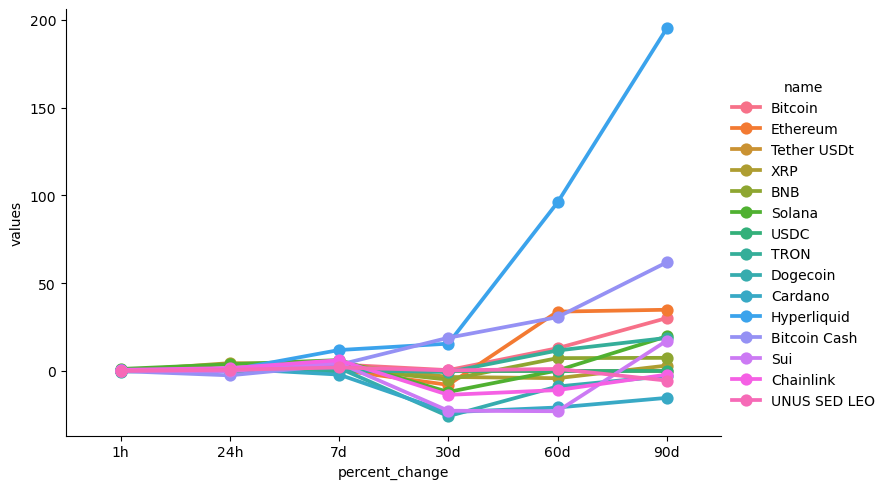

In [154]:
#vẽ biểu đồ trực quan hoá
#hue: phân loại dữ liệu bằng màu sắc
sns.catplot(x = 'percent_change', y = 'values', hue = 'name', data = df35, kind = 'point', height=5, aspect=1.5 )

In [110]:
#xem giá thay đổi theo thời gian của Bitcoin
df36 = df3[['name', 'quote.USD.price', 'timestamp']]
df36 = df36.query(" name == 'Bitcoin' ")
df36 = df36.drop_duplicates()
df36 = df36.tail(6)

In [112]:
df36

name  quote.USD.price                   timestamp
2250  Bitcoin     107362.39132  2025-06-29 00:10:19.786880
2280  Bitcoin     107349.69463  2025-06-29 00:11:20.620770
2310  Bitcoin     107356.32671  2025-06-29 00:12:21.450089
2340  Bitcoin     107356.32671  2025-06-29 00:13:22.357005
2370  Bitcoin     107376.47743  2025-06-29 00:14:23.181419
2400  Bitcoin     107387.73255  2025-06-29 00:15:24.162297

<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

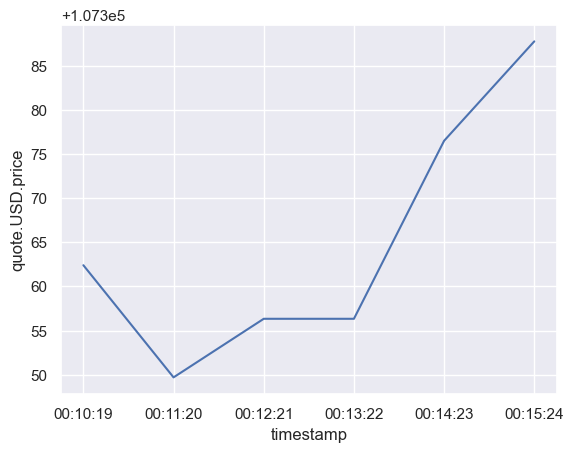

In [116]:
sns.set_theme(style = 'darkgrid')
sns.lineplot(x = 'timestamp', y = 'quote.USD.price', data = df36)

In [114]:
df36['timestamp'] = df36['timestamp'].replace(['2025-06-29 00:10:19.786880', '2025-06-29 00:11:20.620770', '2025-06-29 00:12:21.450089', '2025-06-29 00:13:22.357005', '2025-06-29 00:14:23.181419', '2025-06-29 00:15:24.162297'],['00:10:19', '00:11:20', '00:12:21', '00:13:22', '00:14:23', '00:15:24'])
df36

name  quote.USD.price timestamp
2250  Bitcoin     107362.39132  00:10:19
2280  Bitcoin     107349.69463  00:11:20
2310  Bitcoin     107356.32671  00:12:21
2340  Bitcoin     107356.32671  00:13:22
2370  Bitcoin     107376.47743  00:14:23
2400  Bitcoin     107387.73255  00:15:24